In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import transforms
from matplotlib import font_manager, rc

from google.colab import drive
drive.mount('/content/gdriv')

!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

data_path = "/content/gdriv/My Drive/Colab Notebooks/Data" 

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache dire

In [ ]:
!pip install pingouin

     |████████████████████████████████| 225kB 9.8MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.9-cp36-none-any.whl size=223375 sha256=95fa5bbe35eaeea10d502397ea5d9653c77d5b08ff9f833e53c1c541865327b8
  Stored in directory: /root/.cache/pip/wheels/6c/d7/26/a23b9ed74061adc5cf8f5e016bbe2902a8ebf63b6471047dbc
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=a3eca660a837f4c1da7d04f7456baf487e1a64a8a46d65845a5d2129252ba389
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=ecd1ea77f29d97f5623b62db57678235bc279eb7e85fec1ceeea7bc86706a4f2
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [ ]:
cnc_dt = pd.read_csv(data_path + '/cnc.csv', encoding = 'cp949')

cnc_dt

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,5,6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
0,작업번호,마킹 길이 (m),절단 길이 (m),철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간(초),절단시간(초)
1,1,46,21.9,30,DZB,1,23,PL233,194,827
2,2,33.9,111.8,12,A,46,23,PL233,324,2906
3,3,49.5,33.5,13,A,2,23,PL234,241,1003
4,4,75.7,174.9,13,A,35,23,PL233,483,4412
...,...,...,...,...,...,...,...,...,...,...
162321,162337,139.8,162,19,AH32,31,23,PL231,827,2899
162322,162338,18.5,28.9,16,A,56,25,PL252,165,930
162323,162339,63.7,25.6,15,AH32,1,26,PL261,345,696
162324,162340,94.7,61.4,19,AH32,2,26,PL261,0,2155


In [ ]:
cnc_dt.columns = cnc_dt.iloc[0,:]
cnc_dt = cnc_dt.iloc[1:,:]
cnc_dt = cnc_dt.reset_index(drop = True)
cnc_dt = cnc_dt.reset_index(drop = False)

In [ ]:
cnc_dt['마킹 길이 (m)'] = cnc_dt['마킹 길이 (m)'].astype(float)
cnc_dt['절단 길이 (m)'] = cnc_dt['절단 길이 (m)'].astype(float)
cnc_dt['철판두께'] = cnc_dt['철판두께'].astype(float)
cnc_dt['절단갯수'] = cnc_dt['절단갯수'].astype(float)
cnc_dt['마킹시간(초)'] = cnc_dt['마킹시간(초)'].astype(float)
cnc_dt['절단시간(초)'] = cnc_dt['절단시간(초)'].astype(float)


In [ ]:
cnc_dt

,index,작업번호,마킹 길이 (m),절단 길이 (m),철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간(초),절단시간(초)
0,0,1,46.0,21.9,30.0,DZB,1.0,23,PL233,194.0,827.0
1,1,2,33.9,111.8,12.0,A,46.0,23,PL233,324.0,2906.0
2,2,3,49.5,33.5,13.0,A,2.0,23,PL234,241.0,1003.0
3,3,4,75.7,174.9,13.0,A,35.0,23,PL233,483.0,4412.0
4,4,5,66.5,66.6,13.0,A,7.0,23,PL233,331.0,1601.0
...,...,...,...,...,...,...,...,...,...,...,...
162320,162320,162337,139.8,162.0,19.0,AH32,31.0,23,PL231,827.0,2899.0
162321,162321,162338,18.5,28.9,16.0,A,56.0,25,PL252,165.0,930.0
162322,162322,162339,63.7,25.6,15.0,AH32,1.0,26,PL261,345.0,696.0
162323,162323,162340,94.7,61.4,19.0,AH32,2.0,26,PL261,0.0,2155.0


In [ ]:
from xgboost import XGBClassifier # model
from xgboost import plot_importance # 중요변수 시각화
from sklearn.model_selection import train_test_split # train/test
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # model 평가

In [ ]:
#pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 150)

In [ ]:
place_dt = cnc_dt.loc[:,'작업장'].str.get_dummies(sep = ', ')

place_dt

,14,21,22,23,24,25,26,27,91,92,96,97
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162320,0,0,0,1,0,0,0,0,0,0,0,0
162321,0,0,0,0,0,1,0,0,0,0,0,0
162322,0,0,0,0,0,0,1,0,0,0,0,0
162323,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
#onehot = pd.get_dummies(cnc_dt,prefix_sep='_',drop_first=True)
col = ['마킹 길이 (m)', '절단 길이 (m)', '철판두께', '절단갯수']
col_y = ['절단시간(초)', '마킹시간(초)']

onehot = pd.get_dummies(cnc_dt, columns = ['철판재질','절단장비'])
onehot = onehot.iloc[:,9:]
cncdt = pd.concat([cnc_dt.loc[:, col], onehot, place_dt, cnc_dt.loc[:, col_y]], axis=1)
#onehot = pd.get_dummies(cnc_dt,prefix_sep='_',drop_first=True)
#print((onehot.columns))
#print((onehot.columns.unique()))
cncdt

,마킹 길이 (m),절단 길이 (m),철판두께,절단갯수,철판재질_32M60C,철판재질_460F32MS,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_D-TM,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZ,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,철판재질_EH36-TM,철판재질_EH40-TM,철판재질_ETL,철판재질_EZ,철판재질_EZB,철판재질_EZB-TM,철판재질_GA,철판재질_KA,철판재질_KAH32,철판재질_KAH32-TM,철판재질_LA,철판재질_LAH32,철판재질_LAH32-TM,철판재질_LAH36,철판재질_LDH32,철판재질_LDH32-TM,철판재질_LEH32-TM,철판재질_NA,철판재질_NAH32,철판재질_NAH32-TM,철판재질_NB,철판재질_NEH32,철판재질_NV32M60C,철판재질_RA,철판재질_RAH32,철판재질_RAH32-TM,철판재질_RAH36,철판재질_SS400,철판재질_UA,철판재질_UAH32,철판재질_UDH32,철판재질_VA,철판재질_VAH32,철판재질_VAH32-TM,철판재질_VAH36,철판재질_VB,철판재질_VDH32-TM,철판재질_VH32O55C,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,14,21,22,23,24,25,26,27,91,92,96,97,절단시간(초),마킹시간(초)
0,46.0,21.9,30.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,827.0,194.0
1,33.9,111.8,12.0,46.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2906.0,324.0
2,49.5,33.5,13.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1003.0,241.0
3,75.7,174.9,13.0,35.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4412.0,483.0
4,66.5,66.6,13.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1601.0,331.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162320,139.8,162.0,19.0,31.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2899.0,827.0
162321,18.5,28.9,16.0,56.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,930.0,165.0
162322,63.7,25.6,15.0,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,696.0,345.0
162323,94.7,61.4,19.0,2

In [ ]:
cncdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162325 entries, 0 to 162324
Columns: 126 entries, 마킹 길이 (m) to 마킹시간(초)
dtypes: float64(6), int64(12), uint8(108)
memory usage: 39.0 MB


In [ ]:
from xgboost import plot_importance
from xgboost import XGBClassifier
from xgboost import XGBRegressor # 회귀트리 모델

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

Y = cncdt['절단시간(초)']
X = cncdt.iloc[:,0:124]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)


print(x_train.shape)

(113627, 124)


In [ ]:
X.head()

,마킹 길이 (m),절단 길이 (m),철판두께,절단갯수,철판재질_32M60C,철판재질_460F32MS,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_D-TM,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZ,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,철판재질_EH32TL,철판재질_EH36,철판재질_EH36-TM,철판재질_EH40-TM,철판재질_ETL,철판재질_EZ,철판재질_EZB,철판재질_EZB-TM,철판재질_GA,철판재질_KA,철판재질_KAH32,철판재질_KAH32-TM,철판재질_LA,철판재질_LAH32,철판재질_LAH32-TM,철판재질_LAH36,철판재질_LDH32,철판재질_LDH32-TM,철판재질_LEH32-TM,철판재질_NA,철판재질_NAH32,철판재질_NAH32-TM,철판재질_NB,철판재질_NEH32,철판재질_NV32M60C,철판재질_RA,철판재질_RAH32,철판재질_RAH32-TM,철판재질_RAH36,철판재질_SS400,철판재질_UA,철판재질_UAH32,철판재질_UDH32,철판재질_VA,철판재질_VAH32,철판재질_VAH32-TM,철판재질_VAH36,철판재질_VB,철판재질_VDH32-TM,철판재질_VH32O55C,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963,14,21,22,23,24,25,26,27,91,92,96,97
0,46.0,21.9,30.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,33.9,111.8,12.0,46.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,49.5,33.5,13.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,75.7,174.9,13.0,35.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,66.5,66.6,13.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
Y.head()

0     827.0
1    2906.0
2    1003.0
3    4412.0
4    1601.0
Name: 절단시간(초), dtype: float64

In [ ]:
print(len(X.columns))
print(len(X.columns.unique()))

124
124


In [ ]:
model = XGBRegressor()
#model = XGBRegressor(n_estimators=400, learning_rate = 0.01, max_depth = 8, gamma = 3, booster = 'dart', subsample = 1, reg_alpha = 20, base_score = 1600)
model.fit(x_train, y_train)
model

[07:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=1600, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=3,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=20, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
col_names = list(x_train.columns)

TypeError: ignored

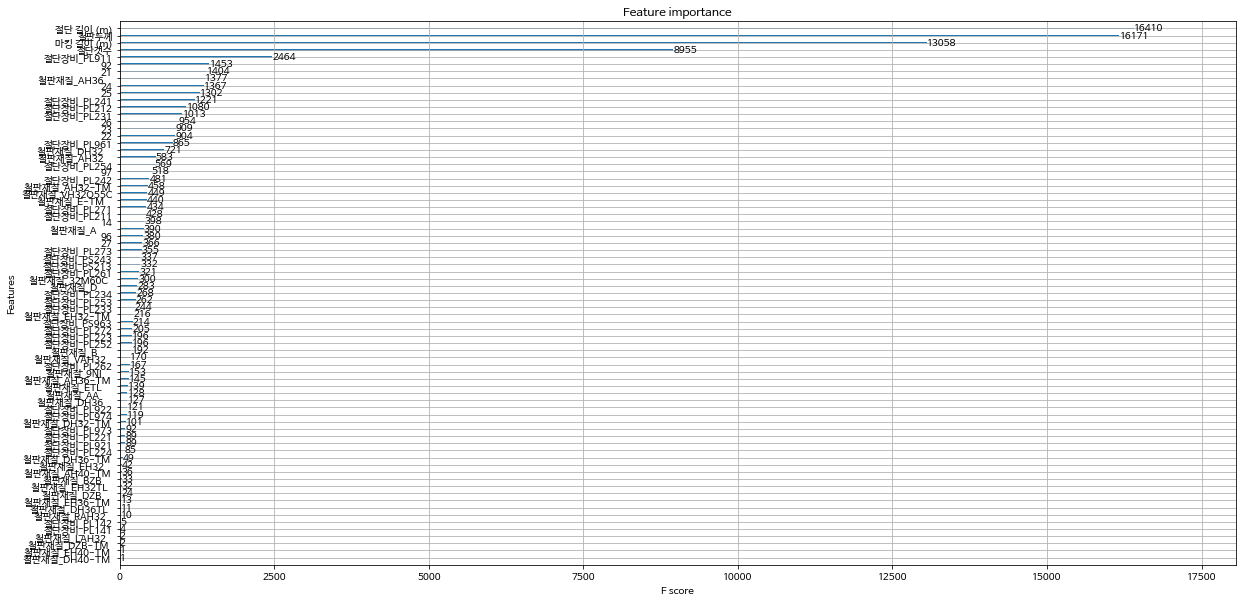

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
plot_importance(model)
plt.yticks(range(10), col_names())
plt.show()

In [ ]:
y_pred = model.predict(x_test)
y_true = y_test

mae = mean_absolute_error(y_true, y_pred)
print(mae) # 2.3400885707453676

mse = mean_squared_error(y_true, y_pred)
print(mse) # 12.75553963355965

291.4078091814061
3430077.7585033826


In [ ]:
predictions = model.predict(x_test)
r_sq = model.score(x_train, y_train)
print(r_sq)
from sklearn.metrics import explained_variance_score
print(explained_variance_score(predictions,y_test))

0.7265483234515405
-0.471366870353485


In [ ]:
model.score(x_test,y_test)

0.4121128183026098